# Transfer Learning

Using pre-trained models in Keras is really easy.

Let's use the ResNet50 model, trained on the imagenet data set, in order to quickly classify new images.

Let's start with a picture of a fighter jet I took while exploring the deserts of California:

In [19]:
import os as os1

In [20]:
print(cwd)

C:\Users\Sanjay G\Documents\Python\MLCourse\MLCourse


In [21]:
activate newenvt

SyntaxError: invalid syntax (<ipython-input-21-52ac4895a291>, line 1)

In [22]:
cwd = os1.getcwd()

Let's load up the modules we need...

In [23]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [33]:
pip install --ignore-installed --upgrade tensorflow 

  Using cached tensorflow-2.7.0-cp38-cp38-win_amd64.whl (430.8 MB)

  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached libclang-12.0.0-py2.py3-none-win_amd64.whl (13.1 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\software\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-3.19.1-cp38-cp38-win_amd64.whl (895 kB)
  Using cached numpy-1.22.0-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached typing_extensions-4.0.1-py3-none-any.whl (22 kB)
  Using cached grpcio-1.43.0-cp38-cp38-win_amd64.whl (3.4 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached wrapt-1.13.3-cp38-cp38-win_amd64.whl (34 kB)
  Using cached h5py-3.6.0-cp38-cp38-win_amd64.whl (2.8 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.23.1-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached Keras_Preproc

In [27]:
import tensorflow as tf

In [28]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()

AttributeError: module 'tensorflow' has no attribute 'Session'

The ResNet50 pre-trained CNN expects inputs of 224x224 resolution, and will classify objects into one of 1,000 possible categories.

Let's load up our picture of a fighter jet, rescale it to the resolution the model requires, and use the model's preprocess_input function to further normalize the image data before feeding it in as input.

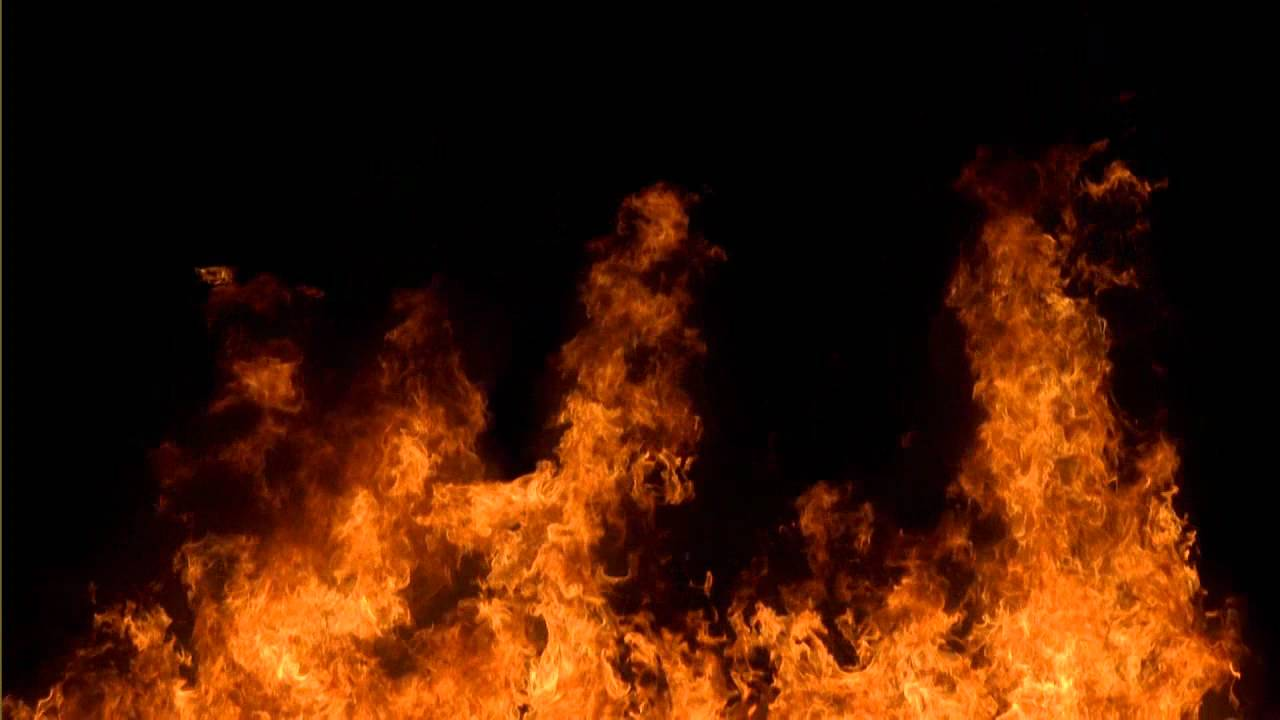

  Using cached tensorflow-2.7.0-cp38-cp38-win_amd64.whl (430.8 MB)
  Using cached protobuf-3.19.1-cp38-cp38-win_amd64.whl (895 kB)
  Using cached wrapt-1.13.3-cp38-cp38-win_amd64.whl (34 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached numpy-1.22.0-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached tensorflow_io_gcs_filesystem-0.23.1-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached typing_extensions-4.0.1-py3-none-any.whl (22 kB)
  Using cached libclang-12.0.0-py2.py3-none-win_amd64.whl (13.1 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.6.0-cp38-cp38-win_amd64.whl (2.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (6

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\software\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [29]:
from IPython.display import Image
Image(filename='fire1.jpg') 

In [32]:
img_path = 'fire2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Let's load up the model itself:

In [31]:
model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 4s 0us/step


It's already trained with weights learned from the Imagenet data set. So all we have to do now is use it! We can call predict() on it, just like we would with any machine learning model now:

In [ ]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

And, it worked! Let's put all of this into a function so we can quickly classify other images:

In [ ]:
def classify(img_path):
    display(Image(filename=img_path))
    
    img = image.load_img(img_path, target_size=(224, 224))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds, top=3)[0])

Let's see if we can stump it. Here are a few other random photos I had in my personal gallery:

In [ ]:
classify('fire7.jpg')

In [ ]:
classify('fire10.jpg')

In [ ]:
classify('fire2.jpg')

In [ ]:
classify('fire3.jpg')

In [ ]:
classify('fire11.jpg')

In [ ]:
classify('fire4.jpg')

That's pretty impressive.

## Your Challenge

Try some photos of your own!

And, try some different pre-trained models. In addition to ResNet50, Keras offers others such as Inception and MobileNet. Refer to the documentation at https://keras.io/applications/ and see if you can get them working as well. Bear in mind different models will have different requirments for the input image size.